##Implementation of Neural Network using Numpy:



In [ ]:
# Creating the data set using numpy array of 0s and 1s.

# As the image is a collection of pixel values in matrix, we will create those matrix of pixel for A, B, C.
  
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
  
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

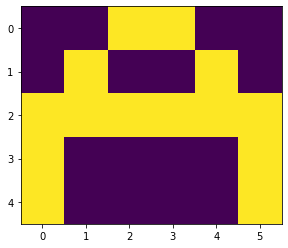

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [ ]:
# converting data and labels into numpy array
  

# Convert the matrix of 0 and 1 into one hot vector, where all the elements in the vector are zero except for one of them,  
# so that we can directly feed it to the neural network,
# these vectors are then stored in a list x.

  
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
                                np.array(c).reshape(1, 30)]
  
  
# Labels are also converted into NumPy array
y = np.array(y)
  
  
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


Defining the architecture of the neural net:
- 1st layer: Input layer(1, 30)
- 2nd layer: Hidden layer (1, 5)
- 3rd layer: Output layer(1, 3)

In [ ]:
# defining and using the activation function
  
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
    
# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)
  
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# out put of layer 2 
      
    # Output layer
    z2 = a1.dot(w2) # input of output layer
    a2 = sigmoid(z2) # output of output layer
    return(a2)
   
# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))
      
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)
    
# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
      
    # hidden layer
    z1 = x.dot(w1)# input from layer 1 
    a1 = sigmoid(z1)# output of layer 2 
      
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
                                   (np.multiply(a1, 1-a1)))
  
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
      
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
      
    return(w1, w2)
  
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)   
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)
   
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()    

In [ ]:
# Initializing the weights, as the neural network is having 3 layers, 
# so there will be 2 weight matrix associate with it.
# The size of each matrix depends on the number of nodes in two connecting layers.
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-8.94174859e-01  7.70445524e-01 -4.75869591e-01  9.26058313e-01
   1.91294007e-01]
 [ 7.57149399e-01  1.53629631e-01  6.79246040e-01 -4.45551880e-01
   2.70796725e-01]
 [ 1.53931479e+00 -1.28512871e+00 -9.27824949e-01 -9.53356362e-01
   4.30554656e-01]
 [ 5.13271249e-01  3.15697726e-01  3.25783050e-01 -9.13726166e-01
   8.55531428e-01]
 [ 1.12234462e+00  8.40565625e-01  5.14167333e-01 -1.05098553e-01
   1.29634605e+00]
 [ 2.85761676e+00  1.23271654e+00 -4.19722332e-02  5.68569058e-01
  -9.20542877e-01]
 [-1.31276439e+00 -3.55073172e-01  1.67270160e-01 -5.63417468e-01
   1.22636396e+00]
 [ 1.13586215e+00 -1.29356701e+00 -1.43006600e+00  5.33926510e-01
   1.23678193e+00]
 [ 1.54468680e+00 -5.82095584e-01 -5.23331348e-01 -2.27303479e+00
   9.17918253e-02]
 [ 2.91732022e-02 -1.45116236e+00  2.10905349e+00  6.17883839e-01
  -1.72084411e+00]
 [ 2.74170877e-02  5.38416720e-01  9.09432879e-01  7.55457951e-01
  -2.89030164e-01]
 [ 3.33689404e-01  1.01272403e-01  1.96706668e-01 -1.53482746e+00

In [ ]:
## ""The arguments of train function are data set list x, 
##correct labels y, weights w1, w2, learning rate = 0.1, 
## no of epochs or iteration.The function will return the
##matrix of accuracy and loss and also the matrix of 
##trained weights w1, w2"""
  
acc, losss, w1, w2 = train(x, y, w1, w2, 0.3, 100)

epochs: 1 ======== acc: 74.29948870642092
epochs: 2 ======== acc: 78.69403805668217
epochs: 3 ======== acc: 81.43387406823129
epochs: 4 ======== acc: 83.32011037431225
epochs: 5 ======== acc: 84.23124757861886
epochs: 6 ======== acc: 85.02507763719058
epochs: 7 ======== acc: 85.79701917924704
epochs: 8 ======== acc: 86.5147704047966
epochs: 9 ======== acc: 87.17857092042914
epochs: 10 ======== acc: 87.791626789493
epochs: 11 ======== acc: 88.36056744452198
epochs: 12 ======== acc: 88.89706228332312
epochs: 13 ======== acc: 89.41543746750223
epochs: 14 ======== acc: 89.92796562227245
epochs: 15 ======== acc: 90.4417930637726
epochs: 16 ======== acc: 90.95899222922881
epochs: 17 ======== acc: 91.4782643386153
epochs: 18 ======== acc: 91.99660216330429
epochs: 19 ======== acc: 92.5103540220865
epochs: 20 ======== acc: 93.01582296546297
epochs: 21 ======== acc: 93.50962195334044
epochs: 22 ======== acc: 93.98889075105959
epochs: 23 ======== acc: 94.45138492314501
epochs: 24 ======== acc: 9

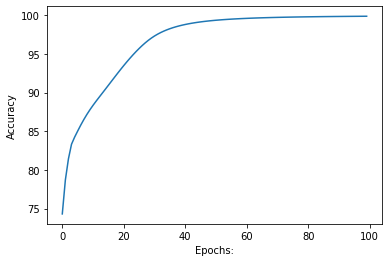

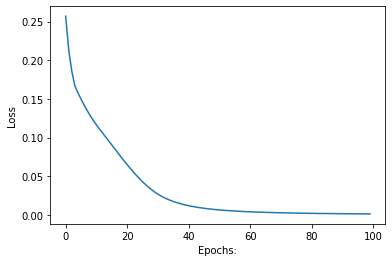

In [ ]:
import matplotlib.pyplot as plt1
  
# ploting accuraccy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
  
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [ ]:
# the trained weigths are
print(w1, "\n", w2)

[[-0.89417486  0.77044552 -0.47586959  0.92605831  0.19129401]
 [ 0.67583563 -0.26496212  1.19178745  0.33139728  0.4283589 ]
 [ 1.58286006 -1.36843661 -0.72085893 -0.48482816  0.90407704]
 [ 0.55681652  0.23238982  0.53274907 -0.44519796  1.32905381]
 [ 1.04103086  0.42197388  1.02670874  0.67185061  1.45390823]
 [ 2.85761676  1.23271654 -0.04197223  0.56856906 -0.92054288]
 [-1.31276439 -0.35507317  0.16727016 -0.56341747  1.22636396]
 [ 1.17940742 -1.37687492 -1.22309998  1.00245471  1.71030431]
 [ 1.5446868  -0.58209558 -0.52333135 -2.27303479  0.09179183]
 [ 0.0291732  -1.45116236  2.10905349  0.61788384 -1.72084411]
 [ 0.15368623  1.910425    0.65020459  0.72136108 -0.77015742]
 [ 0.3336894   0.1012724   0.19670667 -1.53482746 -0.24321894]
 [ 0.49604722  0.18109953  0.2524998  -0.47013214  1.02435759]
 [-0.18431864 -1.23084475 -1.79431984 -0.37236234  0.30507932]
 [ 1.24638406  2.0070411  -0.3946837   0.99322645 -1.6214607 ]
 [ 0.92010244  1.89964607 -0.26696626 -1.12259712 -1.84

Image is of letter B.


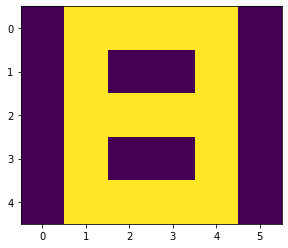

In [ ]:
predict(x[1], w1, w2)
